# Question 5.1

In [1]:
install.packages("outliers")
library(outliers)


  There is a binary version available but the source version is later:
         binary source needs_compilation
outliers   0.14   0.15             FALSE



installing the source package 'outliers'



In [2]:
crime_data <- read.table("./data 5.1/uscrime.txt", header = TRUE)

In [3]:
head(crime_data)

M,So,Ed,Po1,Po2,LF,M.F,Pop,NW,U1,U2,Wealth,Ineq,Prob,Time,Crime
15.1,1,9.1,5.8,5.6,0.510,95.0,33,30.1,0.108,4.1,3940,26.1,0.084602,26.2011,791
14.3,0,11.3,10.3,9.5,0.583,101.2,13,10.2,0.096,3.6,5570,19.4,0.029599,25.2999,1635
14.2,1,8.9,4.5,4.4,0.533,96.9,18,21.9,0.094,3.3,3180,25.0,0.083401,24.3006,578
13.6,0,12.1,14.9,14.1,0.577,99.4,157,8.0,0.102,3.9,6730,16.7,0.015801,29.9012,1969
14.1,0,12.1,10.9,10.1,0.591,98.5,18,3.0,0.091,2.0,5780,17.4,0.041399,21.2998,1234
12.1,0,11.0,11.8,11.5,0.547,96.4,25,4.4,0.084,2.9,6890,12.6,0.034201,20.9995,682


In [4]:
crime_column <- crime_data$Crime

### Grubbs Test

In [5]:
grubbs_result <- grubbs.test(crime_column)
grubbs_result


	Grubbs test for one outlier

data:  crime_column
G = 2.81287, U = 0.82426, p-value = 0.07887
alternative hypothesis: highest value 1993 is an outlier


### Highest value 1993 is an outlier


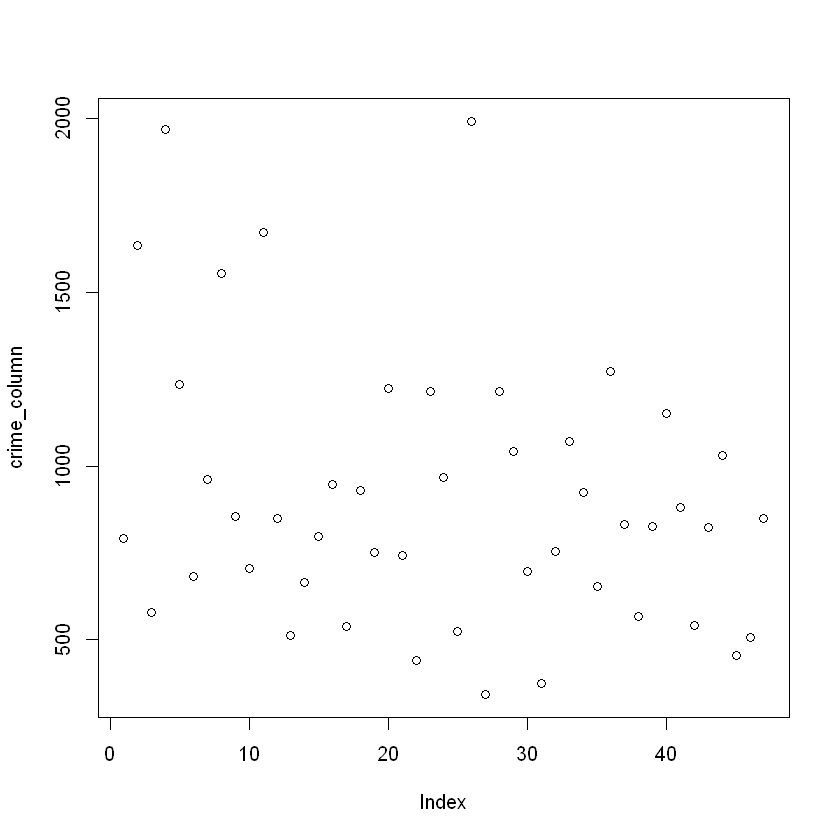

In [6]:
plot(crime_column)

# Question 6.1

#### I am working as a data analyst for a company that provides services to chronically homeless people, my task is to analyze personal information and how people access and benefit from the services provided. The number of people housed every month is not the same. 
#### - Critical Value: Services or programs they were provided, weather.
#### - Threshold: We can identify which services or programs have higher rates to refer clients to that program first. And pay more attention or hire more employees when extreme weather coming. 


# Question 6.2

#### I calculated the average temperature across all days, then calculated the average temperature across all years.
#### After trial and error, I found T = 85 and C = 4

In [31]:
temps_data <- read.table("./data 6.2/temps.txt", header = TRUE, row.name = 1)

In [32]:
head(temps_data)

,X1996,X1997,X1998,X1999,X2000,X2001,X2002,X2003,X2004,X2005,X2006,X2007,X2008,X2009,X2010,X2011,X2012,X2013,X2014,X2015
1-Jul,98,86,91,84,89,84,90,73,82,91,93,95,85,95,87,92,105,82,90,85
2-Jul,97,90,88,82,91,87,90,81,81,89,93,85,87,90,84,94,93,85,93,87
3-Jul,97,93,91,87,93,87,87,87,86,86,93,82,91,89,83,95,99,76,87,79
4-Jul,90,91,91,88,95,84,89,86,88,86,91,86,90,91,85,92,98,77,84,85
5-Jul,89,84,91,90,96,86,93,80,90,89,90,88,88,80,88,90,100,83,86,84
6-Jul,93,84,89,91,96,87,93,84,90,82,81,87,82,87,89,90,98,83,87,84


#### Average temperature for each day across the years

In [33]:
avg_temps <- rowMeans(temps_data[, -1]) 

#### The average temperature of all times.

In [34]:
mean <- mean(avg_temps)
mean

[1] 83.31921

#### Differences form Mean

In [35]:
different <- avg_temps - mean

#### Set C = 3

In [72]:
C <- 3

#### Adjust differences by subtracting C

In [73]:
diff_C <- different - C

#### Initialize Empty Vectors for Cumulative Sum

In [74]:
precusum <- 0 * diff_C

In [75]:
cusum <- append(precusum, 0)
# cusum

#### Cumulative sum 

In [76]:
for (i in 1:length(diff_C)) 
     {
  checker <- cusum[i] + diff_C[i]
  
  ifelse(checker > 0, cusum[i+1] <- checker, cusum[i+1] <- 0) 
}

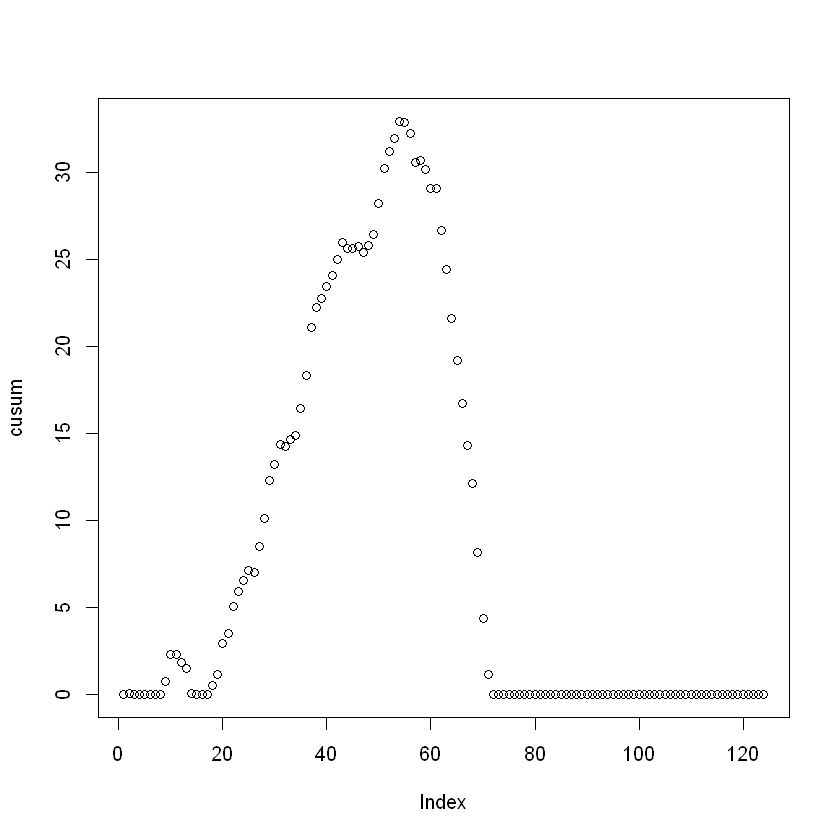

In [66]:
plot(cusum)


In [67]:
#### Identify Points Where CUSUM Exceeds Threshold: Pick T = 85

In [78]:
which(cusum >= 85)

6-Aug  7-Aug  8-Aug  9-Aug 10-Aug 11-Aug 12-Aug 13-Aug 14-Aug 15-Aug 16-Aug 
    37     38     39     40     41     42     43     44     45     46     47 
17-Aug 18-Aug 19-Aug 20-Aug 21-Aug 22-Aug 23-Aug 24-Aug 25-Aug 26-Aug 27-Aug 
    48     49     50     51     52     53     54     55     56     57     58 
28-Aug 29-Aug 30-Aug 31-Aug  1-Sep  2-Sep  3-Sep  4-Sep  5-Sep  6-Sep  7-Sep 
    59     60     61     62     63     64     65     66     67     68     69 
 8-Sep  9-Sep 10-Sep 11-Sep 12-Sep 13-Sep 14-Sep 15-Sep 16-Sep 17-Sep 18-Sep 
    70     71     72     73     74     75     76     77     78     79     80 
19-Sep 20-Sep 21-Sep 22-Sep 23-Sep 24-Sep 
    81     82     83     84     85     86

#### Days between July 1st to September 24th have highest average temperature. We found temperature started dropping after September 24th. So September 24th is when unofficial summer ends.